In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import make_classification

In [5]:
# Create the Dataset (Binary Dataset)

X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

In [7]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [9]:
# Model Training

model = LogisticRegression()

In [11]:
model.fit(X_train, y_train)

LogisticRegression()

In [13]:
# Prediction

y_pred = model.predict(X_test)

In [15]:
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0])

In [17]:
model.predict_proba(X_test)

array([[7.74477909e-01, 2.25522091e-01],
       [3.36684957e-02, 9.66331504e-01],
       [6.70682154e-01, 3.29317846e-01],
       [7.98668032e-02, 9.20133197e-01],
       [9.76616650e-01, 2.33833501e-02],
       [4.13572804e-02, 9.58642720e-01],
       [9.79028767e-01, 2.09712329e-02],
       [9.59367261e-01, 4.06327393e-02],
       [8.08520049e-01, 1.91479951e-01],
       [6.84954318e-01, 3.15045682e-01],
       [9.13669448e-01, 8.63305524e-02],
       [2.63597018e-01, 7.36402982e-01],
       [5.25844192e-01, 4.74155808e-01],
       [2.11912354e-01, 7.88087646e-01],
       [7.93592056e-01, 2.06407944e-01],
       [9.46621678e-01, 5.33783219e-02],
       [2.62957933e-02, 9.73704207e-01],
       [3.24212617e-01, 6.75787383e-01],
       [3.14803584e-01, 6.85196416e-01],
       [2.04956217e-01, 7.95043783e-01],
       [5.04587065e-01, 4.95412935e-01],
       [9.66703630e-01, 3.32963696e-02],
       [2.00514796e-01, 7.99485204e-01],
       [7.77891908e-01, 2.22108092e-01],
       [8.729863

In [19]:
score = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(score)
print(cm)
print(classification_report(y_test, y_pred))

0.8466666666666667
[[118  17]
 [ 29 136]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       135
           1       0.89      0.82      0.86       165

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



## Hyperparameter tuning and Cross Validation

In [22]:
logistic_regression = LogisticRegression()
penalty = ['l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

In [24]:
param = dict(penalty=penalty, C=c_values, solver=solver)

In [26]:
# Gridserach CV - With this we try to find the best parameters for our model with all the parameters in param

cv = StratifiedKFold()
grid = GridSearchCV(estimator=logistic_regression, param_grid=param, scoring='accuracy', cv=cv, n_jobs=-1)

In [28]:
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [29]:
grid.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}

In [30]:
grid.best_score_

0.8785714285714287

In [31]:
y_pred_grid = grid.predict(X_test)

In [32]:
score = accuracy_score(y_test, y_pred_grid)
cm = confusion_matrix(y_test, y_pred_grid)
print(score)
print(cm)
print(classification_report(y_test, y_pred_grid))

0.8533333333333334
[[124  11]
 [ 33 132]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       135
           1       0.92      0.80      0.86       165

    accuracy                           0.85       300
   macro avg       0.86      0.86      0.85       300
weighted avg       0.86      0.85      0.85       300



## Randomised Search CV

In [34]:
new_logistic = LogisticRegression()
randomcv = RandomizedSearchCV(estimator=new_logistic, param_distributions=param, cv=5, scoring='accuracy')

In [41]:
randomcv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [43]:
randomcv.best_score_

0.8728571428571428

In [45]:
randomcv.best_params_

{'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.1}

In [47]:
y_pred_random = randomcv.predict(X_test)

In [49]:
score = accuracy_score(y_test, y_pred_random)
cm = confusion_matrix(y_test, y_pred_random)
print(score)
print(cm)
print(classification_report(y_test, y_pred_random))

0.8533333333333334
[[120  15]
 [ 29 136]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       135
           1       0.90      0.82      0.86       165

    accuracy                           0.85       300
   macro avg       0.85      0.86      0.85       300
weighted avg       0.86      0.85      0.85       300



## Logistic Regression for Multiclass Classification (OVR -> One Versus rest) 

In [52]:
# creating Dataset with 3 classifications

X, y = make_classification(n_samples=1000, n_features=10, n_classes=3, n_informative=3, random_state=42)

In [54]:
X_train, X_test, y_train, y_test  = train_test_split(X_train, y_train)

In [56]:
mul_logistic = LogisticRegression(multi_class='ovr')
mul_logistic.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [58]:
y_pred_mul = mul_logistic.predict(X_test)

In [60]:
score = accuracy_score(y_test, y_pred_mul)
cm = confusion_matrix(y_test, y_pred_mul)
print(score)
print(cm)
print(classification_report(y_test, y_pred_mul))

0.8571428571428571
[[82 14]
 [11 68]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        96
           1       0.83      0.86      0.84        79

    accuracy                           0.86       175
   macro avg       0.86      0.86      0.86       175
weighted avg       0.86      0.86      0.86       175



## Logistic Regression for Imbalanced dataset

In [63]:
X, y = make_classification(n_samples=1000, n_features=2, n_clusters_per_class=1, n_redundant=0, weights=[0.99],random_state=10)

# Weight = 0.99 means one category will have more number of datapoints compared to the other category.

In [65]:
X

array([[ 1.45122049, -1.08670474],
       [ 2.08029047, -0.97808443],
       [ 1.91805213, -1.0431487 ],
       ...,
       [ 0.83675119, -0.54161851],
       [ 0.45782986, -1.05177133],
       [ 0.27891721, -1.16309231]])

In [67]:
Counter(y)

Counter({0: 985, 1: 15})

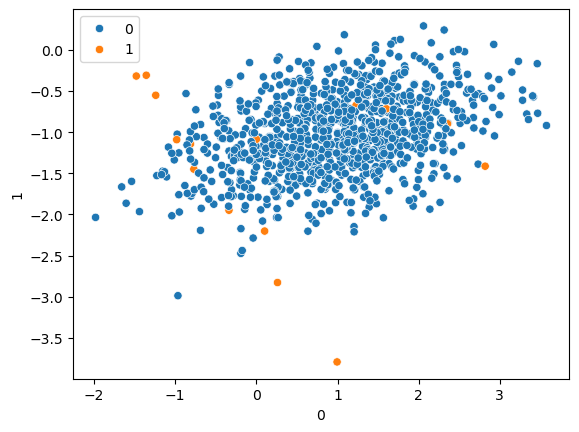

In [69]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)
plt.show()

In [71]:
X_train, X_test, y_train, y_test  = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

In [73]:
# Hyperparameter Tuning

model_imbalanced = LogisticRegression()
penalty = ['l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
solver = ['lbfgs', 'newton-cg', 'sag', 'saga']
class_weight = [{0:w, 1:y} for w in [1, 10, 50, 100] for y in [1, 10, 50, 100]]

In [75]:
class_weight         # The category with less frequescy will be given more wightage. Here 1 is in less frequency, so it w 

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [77]:
params = dict(penalty=penalty, C=c_values, solver=solver, class_weight=class_weight)

In [79]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [81]:
# Gridserach CV 

cv = StratifiedKFold()
grid = GridSearchCV(estimator=model_imbalanced, param_grid=params, scoring='accuracy', cv=cv)

In [83]:
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']},
             scoring='accuracy')

In [84]:
grid.best_params_

{'C': 0.1, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l1', 'solver': 'saga'}

In [85]:
grid.best_score_

0.8829276209023045

In [86]:
y_pred_imbalanced = grid.predict(X_test)

In [87]:
score = accuracy_score(y_test, y_pred_imbalanced)
cm = confusion_matrix(y_test, y_pred_imbalanced)
print(score)
print(cm)
print(classification_report(y_test, y_pred_imbalanced))

0.8636363636363636
[[62  9]
 [ 9 52]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        71
           1       0.85      0.85      0.85        61

    accuracy                           0.86       132
   macro avg       0.86      0.86      0.86       132
weighted avg       0.86      0.86      0.86       132



## Logistic Regression with ROC Curve and ROC AUC Score

In [132]:
# Generate Binary Dataset

X, y = make_classification(n_samples=1000, n_classes=2, n_informative=2, n_redundant=0, random_state=1)

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [136]:
# Create a dummy model with default output as 0.

dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [138]:
# Basic Logistic model

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [140]:
# Prediction based on probability

model_prob = model.predict_proba(X_test)

In [142]:
model_prob

array([[9.43748068e-01, 5.62519321e-02],
       [3.25353848e-01, 6.74646152e-01],
       [9.90831265e-01, 9.16873478e-03],
       [2.51858991e-01, 7.48141009e-01],
       [9.07734393e-01, 9.22656066e-02],
       [6.78450561e-01, 3.21549439e-01],
       [2.75665240e-01, 7.24334760e-01],
       [9.77316594e-01, 2.26834057e-02],
       [1.50437851e-01, 8.49562149e-01],
       [2.77468125e-01, 7.22531875e-01],
       [8.83440812e-01, 1.16559188e-01],
       [9.65195549e-01, 3.48044506e-02],
       [9.97074663e-01, 2.92533715e-03],
       [9.45623829e-01, 5.43761712e-02],
       [2.68386712e-01, 7.31613288e-01],
       [7.49437279e-01, 2.50562721e-01],
       [1.66314937e-01, 8.33685063e-01],
       [1.04113525e-01, 8.95886475e-01],
       [8.04005990e-01, 1.95994010e-01],
       [8.85378832e-01, 1.14621168e-01],
       [9.18405923e-01, 8.15940772e-02],
       [9.79674893e-01, 2.03251069e-02],
       [2.09525359e-01, 7.90474641e-01],
       [9.84897456e-01, 1.51025442e-02],
       [8.479886

In [144]:
# Let's focus on the positive outcome

model_prob = model_prob[:, 1]

In [146]:
model_prob

array([5.62519321e-02, 6.74646152e-01, 9.16873478e-03, 7.48141009e-01,
       9.22656066e-02, 3.21549439e-01, 7.24334760e-01, 2.26834057e-02,
       8.49562149e-01, 7.22531875e-01, 1.16559188e-01, 3.48044506e-02,
       2.92533715e-03, 5.43761712e-02, 7.31613288e-01, 2.50562721e-01,
       8.33685063e-01, 8.95886475e-01, 1.95994010e-01, 1.14621168e-01,
       8.15940772e-02, 2.03251069e-02, 7.90474641e-01, 1.51025442e-02,
       1.52011381e-01, 9.51153425e-01, 9.33306344e-01, 1.17174675e-01,
       4.20411531e-01, 1.39678686e-02, 9.49857200e-01, 6.37557051e-01,
       3.09289474e-01, 8.57298732e-01, 8.64218450e-01, 7.38279491e-01,
       5.32873493e-03, 1.70303057e-02, 2.84826254e-02, 1.19278938e-01,
       2.42189244e-03, 9.39566350e-01, 3.06070849e-02, 9.94489077e-01,
       1.86702712e-01, 4.71926980e-01, 8.13150297e-02, 9.44585349e-01,
       3.37210636e-01, 5.19520094e-01, 9.25492221e-01, 1.36876807e-03,
       8.93966600e-01, 9.51749794e-01, 9.96270194e-01, 5.66826972e-02,
      

In [148]:
# Let's calculate the scores

dummy_model_auc = roc_auc_score(y_test, dummy_model_prob)
model_auc = roc_auc_score(y_test, model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.941123710679736


In [150]:
# calculate ROC Curves
dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob)

In [156]:
thresholds

array([           inf, 9.99142420e-01, 9.60321077e-01, 9.57253869e-01,
       8.60535429e-01, 8.57298732e-01, 8.40937266e-01, 8.37120479e-01,
       7.95733484e-01, 7.91542565e-01, 7.90474641e-01, 7.86562169e-01,
       7.59837882e-01, 7.48141009e-01, 7.30957852e-01, 7.26841614e-01,
       7.22531875e-01, 7.21418711e-01, 6.93042463e-01, 6.90054468e-01,
       6.85601808e-01, 6.78882584e-01, 6.54312971e-01, 6.47243777e-01,
       6.31793670e-01, 6.25210338e-01, 5.86396828e-01, 5.83501478e-01,
       5.76452179e-01, 5.50153782e-01, 5.19520094e-01, 5.15002032e-01,
       4.75863172e-01, 4.71926980e-01, 4.23618244e-01, 3.82362480e-01,
       3.50635577e-01, 3.47551594e-01, 3.37210636e-01, 3.27418781e-01,
       3.23089225e-01, 2.73028745e-01, 2.50562721e-01, 1.95994010e-01,
       1.92051859e-01, 1.78853925e-01, 1.74810662e-01, 1.61143315e-01,
       1.52011381e-01, 1.17174675e-01, 1.16559188e-01, 6.95909447e-02,
       6.95068520e-02, 2.84852114e-04])

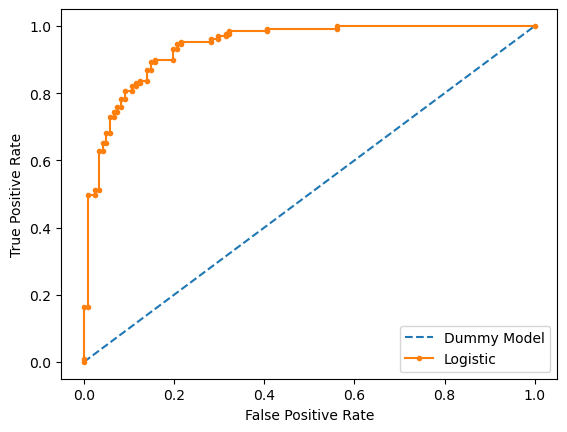

In [158]:
# plot the roc curve for the model

plt.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

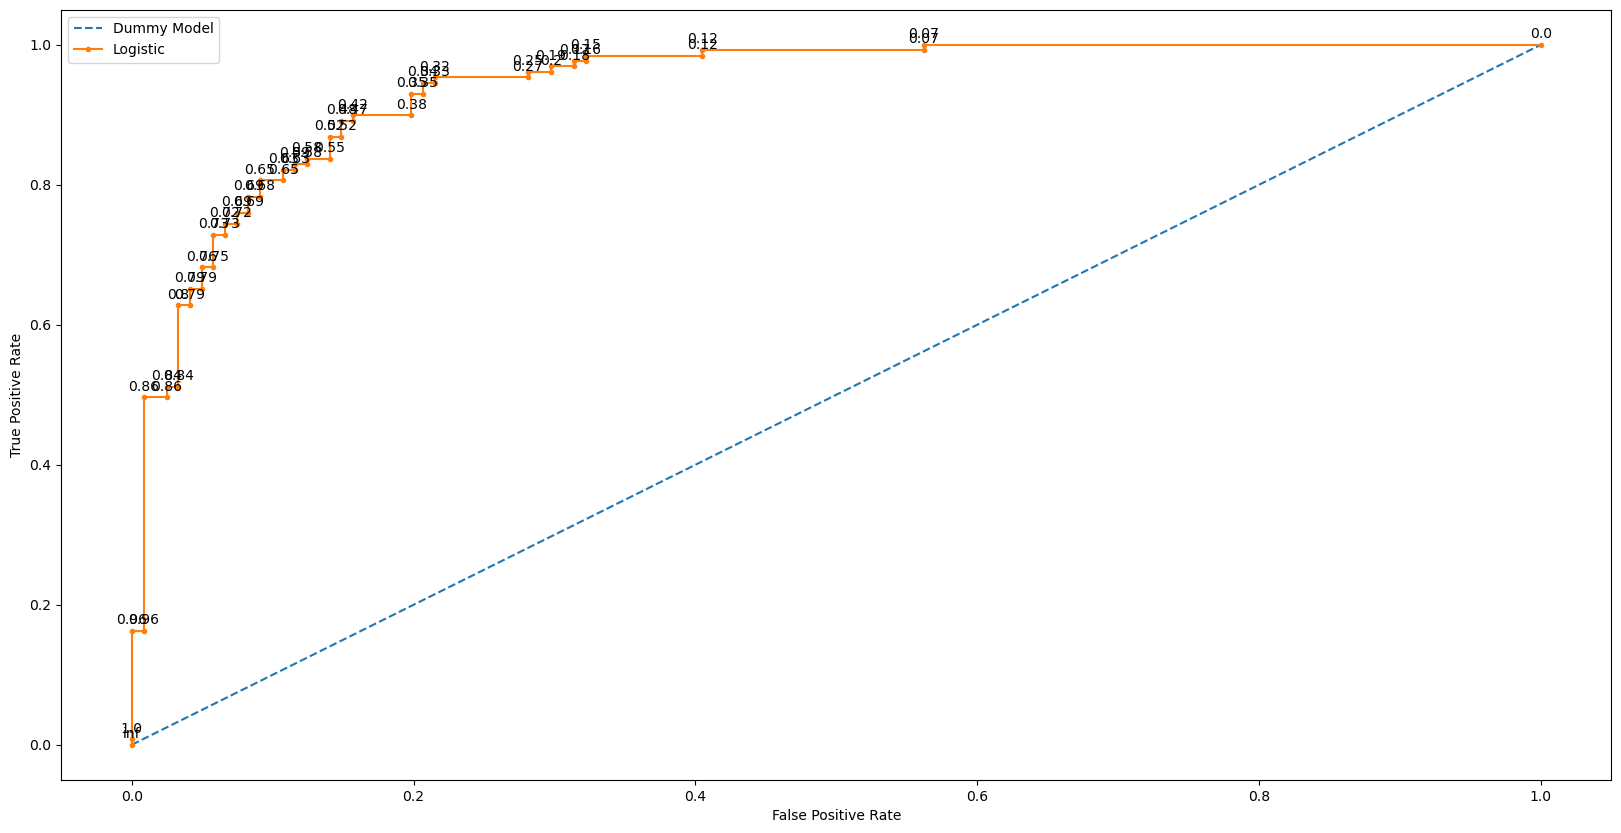

In [176]:
# plot the roc curve for the model

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)

# Plot the ROC curves
ax.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
ax.plot(model_fpr, model_tpr, marker='.', label='Logistic')

# Annotate thresholds
for fpr, tpr, thresh in zip(model_fpr, model_tpr, thresholds):
    ax.annotate(f'{np.round(thresh, 2)}', xy=(fpr, tpr), textcoords="offset points", xytext=(0,5), ha='center')

# Axis labels and legend
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()

plt.show()